In [6]:
import pandas as pd

injuries_df = pd.read_csv("/Users/noah/Desktop/NBA_injuries_project/ACL_Ach_final.csv")

## switching date column to datetime
injuries_df["date"] =  pd.to_datetime(injuries_df["date"])


def assign_season(date):
    if date <= pd.Timestamp("2010-06-05"):
        return "2009-10"
    elif date <= pd.Timestamp("2011-06-05"):
        return "2010-11"
    elif date <= pd.Timestamp("2012-06-05"):
        return "2011-12"
    elif date <= pd.Timestamp("2013-06-05"):
        return "2012-13"
    elif date <= pd.Timestamp("2014-06-05"):
        return "2013-14"
    elif date <= pd.Timestamp("2015-06-05"):
        return "2014-15"
    elif date <= pd.Timestamp("2016-06-05"):
        return "2015-16"
    elif date <= pd.Timestamp("2017-06-05"):
        return "2016-17"
    elif date <= pd.Timestamp("2018-06-05"):
        return "2017-18"
    elif date <= pd.Timestamp("2019-06-05"):
        return "2018-19"
    
    # Special case: COVID Bubble Season ended Oct 11, 2020
    elif date <= pd.Timestamp("2020-10-11"):
        return "2019-20"
    elif date <= pd.Timestamp("2021-06-05"):
        return "2020-21"
    elif date <= pd.Timestamp("2022-06-05"):
        return "2021-22"
    elif date <= pd.Timestamp("2023-06-05"):
        return "2022-23"
    elif date <= pd.Timestamp("2024-06-05"):
        return "2023-24"
    else:
        return "2024-25"

injuries_df["season"] = injuries_df["date"].apply(assign_season)


In [7]:
injuries_df.head(15)

,player,reason,date,team,season
0,Jonas Jerebko,torn achilles,2010-10-06,Pistons,2010-11
1,Jeff Ayres,torn acl,2010-10-08,Blazers,2010-11
2,Kendrick Perkins,torn acl,2010-10-26,Celtics,2010-11
3,Michael Redd,torn acl,2010-10-27,Bucks,2010-11
4,Mehmet Okur,torn achilles,2010-10-27,Jazz,2010-11
5,Josh Howard,torn acl,2010-10-28,Wizards,2010-11
6,DeSagana Diop,torn achilles,2011-01-03,Bobcats,2010-11
7,Gani Lawal,torn acl,2011-01-06,Suns,2010-11
8,David West,torn acl,2011-03-25,Hornets,2010-11
9,Darrell Arthur,torn achilles,2011-12-20,Grizzlies,2011-12


In [6]:
## awesome now we have our date column


In [8]:
##now its time to group by season and injury type in order to graph it

In [11]:
grouped = injuries_df.groupby(["season", "reason"]).size().reset_index(name="count")
grouped.head()

,season,reason,count
0,2010-11,torn achilles,3
1,2010-11,torn acl,6
2,2011-12,torn achilles,2
3,2011-12,torn acl,5
4,2012-13,torn achilles,4


KeyError: 'torn acl '

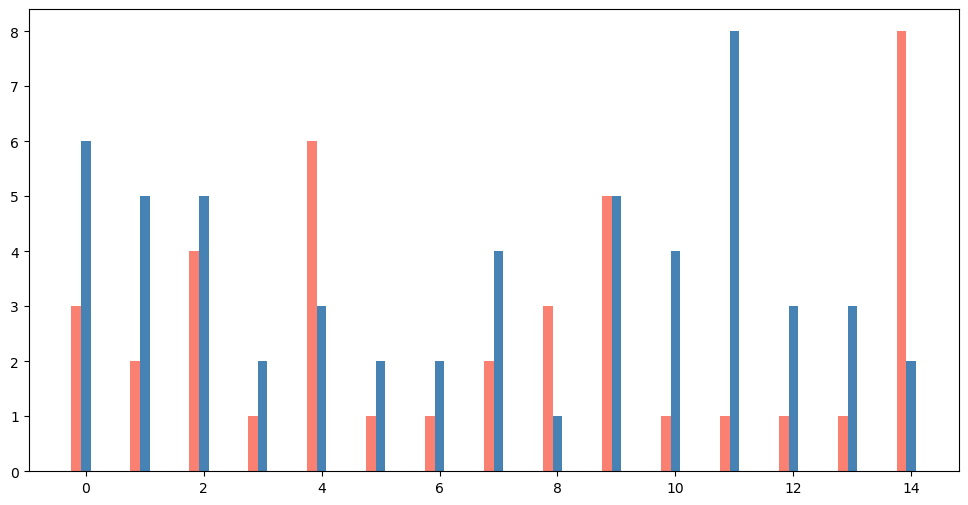

In [17]:
import matplotlib.pyplot as plt

# Pivot for stacked bars
pivot = grouped.pivot(index="season", columns="reason", values="count").fillna(0)

# Sort seasons chronologically
pivot = pivot.sort_index()

# Plot
pivot.plot(kind="bar", stacked=False, figsize=(12,6), color={"torn acl": "steelblue", "torn achilles": "salmon"})

plt.title("NBA ACL vs Achilles Injuries by Season")
plt.ylabel("Number of Injuries")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.legend(title="Injury Type")
plt.tight_layout()
plt.show()


In [20]:
def classify_injury(reason):
    reason = reason.lower()
    if "achilles" in reason:
        return "Achilles"
    elif "acl" in reason:
        return "ACL"
    else:
        return "Other"

injuries_df["injury_type"] = injuries_df["reason"].apply(classify_injury)

In [21]:
grouped = injuries_df.groupby(["season", "reason"]).size().reset_index(name="count")
grouped.head()

,season,reason,count
0,2010-11,torn achilles,3
1,2010-11,torn acl,6
2,2011-12,torn achilles,2
3,2011-12,torn acl,5
4,2012-13,torn achilles,4


In [22]:
injuries_df.head()

,player,reason,date,team,season,injury_type
0,Jonas Jerebko,torn achilles,2010-10-06,Pistons,2010-11,Achilles
1,Jeff Ayres,torn acl,2010-10-08,Blazers,2010-11,ACL
2,Kendrick Perkins,torn acl,2010-10-26,Celtics,2010-11,ACL
3,Michael Redd,torn acl,2010-10-27,Bucks,2010-11,ACL
4,Mehmet Okur,torn achilles,2010-10-27,Jazz,2010-11,Achilles


In [23]:
grouped = injuries_df.groupby(["season", "injury_type"]).size().reset_index(name="count")
grouped.head()

,season,injury_type,count
0,2010-11,ACL,6
1,2010-11,Achilles,3
2,2011-12,ACL,5
3,2011-12,Achilles,2
4,2012-13,ACL,5


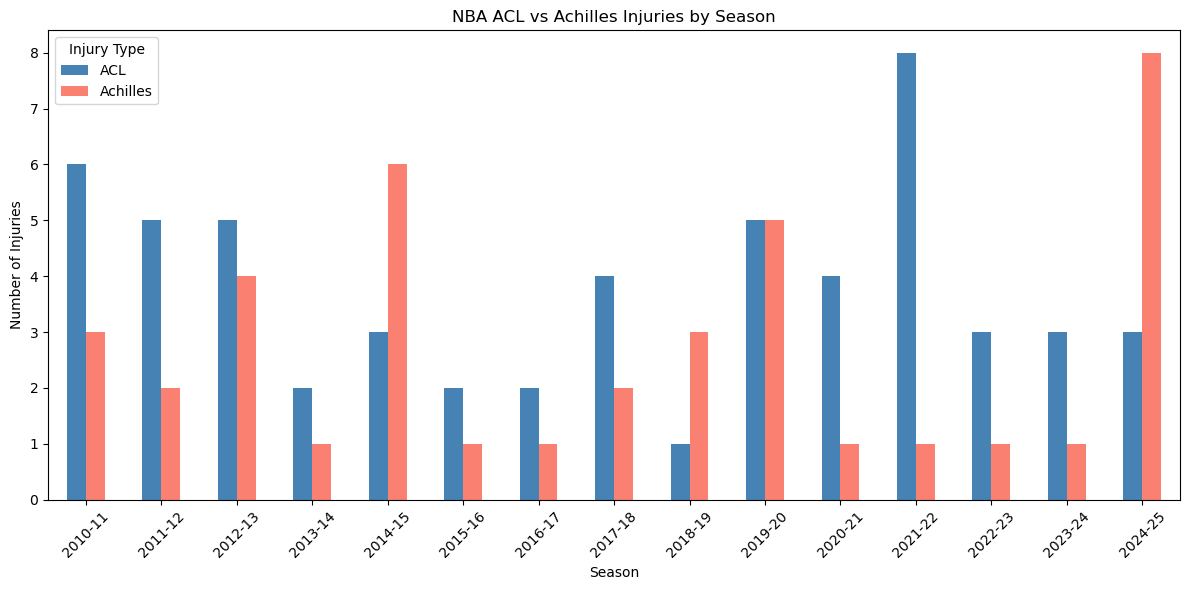

In [25]:
import matplotlib.pyplot as plt

# Pivot for stacked bars
pivot = grouped.pivot(index="season", columns="injury_type", values="count").fillna(0)

# Sort seasons chronologically
pivot = pivot.sort_index()

# Plot
pivot.plot(kind="bar", stacked=False, figsize=(12,6), color={"ACL": "steelblue", "Achilles": "salmon"})

plt.title("NBA ACL vs Achilles Injuries by Season")
plt.ylabel("Number of Injuries")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.legend(title="Injury Type")
plt.tight_layout()
plt.show()


In [27]:
# Grouped looks like: season | injury_type | count

# Get average per injury type
averages = (
    grouped.groupby("injury_type")["count"]
    .mean()
    .round(2)
    .to_dict()
)

print("Average injuries per year:")
for injury_type, avg in averages.items():
    print(f"{injury_type}: {avg}")


Average injuries per year:
ACL: 3.73
Achilles: 2.67


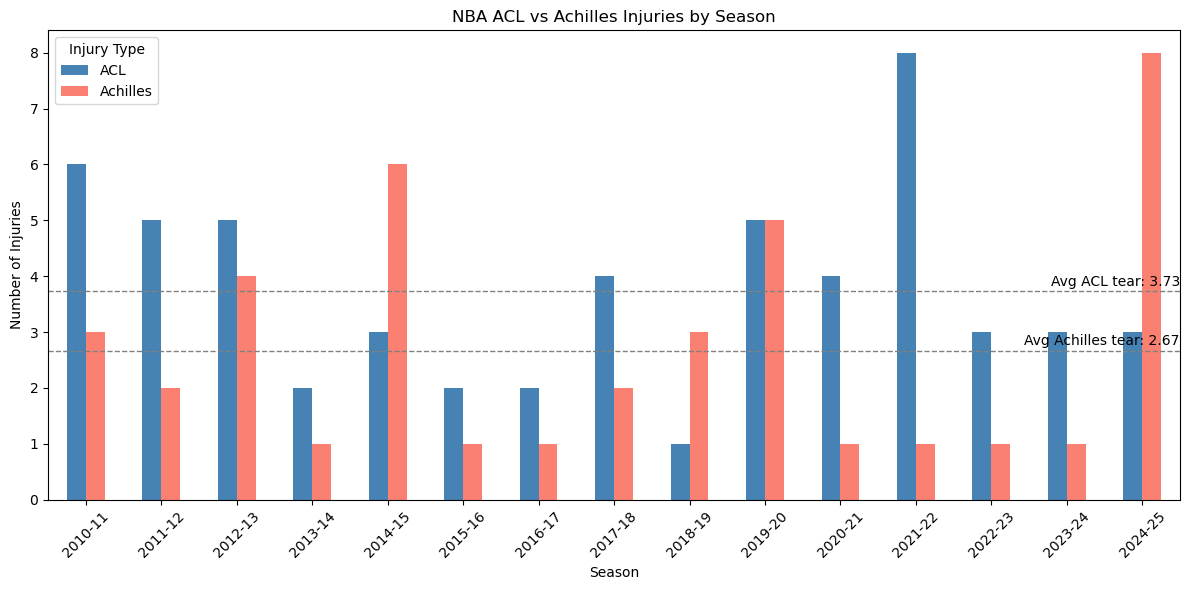

In [43]:
import matplotlib.pyplot as plt

pivot = grouped.pivot(index="season", columns="injury_type", values="count").fillna(0)
pivot = pivot.sort_index()

ax = pivot.plot(kind="bar", figsize=(12, 6), color={"ACL": "steelblue", "Achilles": "salmon"})

# Add average lines
for injury_type in ["ACL", "Achilles"]:
    avg = averages[injury_type]
    ax.axhline(y=avg, color="gray", linestyle="--", linewidth=1)
    ax.text(len(pivot)-0.5, avg + 0.1, f"Avg {injury_type} tear: {avg}", color="black", ha="right", fontsize=10)

# Labels and styling
plt.title("NBA ACL vs Achilles Injuries by Season")
plt.ylabel("Number of Injuries")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.legend(title="Injury Type")
plt.tight_layout()



# Save _before_ showing
plt.savefig(
    "/Users/noah/Desktop/NBA_injuries_project/results/acl_achilles_injury_bar_chart.png",
    dpi=300,
    bbox_inches="tight"
)


plt.show()

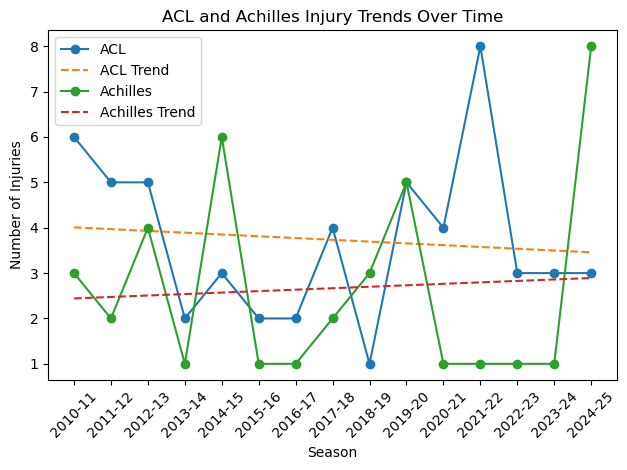

In [45]:
from scipy.stats import linregress
import numpy as np

# Convert season strings to numeric (e.g., "2009-10" → 2009)
pivot["season_start"] = pivot.index.str[:4].astype(int)

# Plot with trendlines
for injury_type in ["ACL", "Achilles"]:
    y = pivot[injury_type].values
    x = pivot["season_start"].values

    # Linear regression
    slope, intercept, r_value, p_value, _ = linregress(x, y)
    trend = intercept + slope * x

    # Plot
    plt.plot(pivot.index, y, marker='o', label=f"{injury_type}")
    plt.plot(pivot.index, trend, linestyle='--', label=f"{injury_type} Trend")

# Styling
plt.title("ACL and Achilles Injury Trends Over Time")
plt.xlabel("Season")
plt.ylabel("Number of Injuries")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()


# Save _before_ showing
plt.savefig(
    "/Users/noah/Desktop/NBA_injuries_project/results/acl_achilles_injury_trend.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

ACL Trend:
  Slope: -0.04
  R-squared: 0.01
  P-value: 0.7337

Achilles Trend:
  Slope: 0.03
  R-squared: 0.00
  P-value: 0.8165



In [ ]:
import pandas as pd

# Example ages in a DataFrame (you need to have computed age for each injury and each player-season)
# injuries_df: columns include ['player_name','age','injury_type','season']
# exposure_df: columns include ['player_name','age','minutes_played','season']

# Define bins and labels
bins   = [0, 25, 30, 34, 100]
labels = ['≤25', '26–30', '31–34', '35+']

# Create age_group columns
injuries_df['age_group']  = pd.cut(injuries_df['age'], bins=bins, labels=labels, right=True)
exposure_df['age_group']  = pd.cut(exposure_df['age'], bins=bins, labels=labels, right=True)


In [4]:
import pandas as pd

injuries_df = pd.read_csv("/Users/noah/Desktop/NBA_injuries_project/ACL_Ach_final.csv")
all_stats = pd.read_csv("/Users/noah/Desktop/NBA_injuries_project/all_seasons_stats.csv")

In [7]:
injuries_df.head()

,player,reason,date,team,season
0,Jonas Jerebko,torn achilles,2010-10-06,Pistons,2010-11
1,Jeff Ayres,torn acl,2010-10-08,Blazers,2010-11
2,Kendrick Perkins,torn acl,2010-10-26,Celtics,2010-11
3,Michael Redd,torn acl,2010-10-27,Bucks,2010-11
4,Mehmet Okur,torn achilles,2010-10-27,Jazz,2010-11


In [8]:
all_stats.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional,season
0,238,A.J. Price,23,IND,PG,56,2,865,145,354,...,106,35,3,59,53,410,0,NaN,priceaj01,2009-10
1,15,Aaron Brooks,25,HOU,PG,82,82,2919,575,1331,...,434,69,14,232,199,1604,0,MIP-1,brookaa01,2009-10
2,360,Aaron Gray,25,2TM,C,32,0,311,42,82,...,22,9,11,18,54,104,0,NaN,grayaa01,2009-10
3,360,Aaron Gray,25,CHI,C,8,0,50,8,21,...,2,0,0,1,10,18,0,NaN,grayaa01,2009-10
4,360,Aaron Gray,25,NOH,C,24,0,261,34,61,...,20,9,11,17,44,86,0,NaN,grayaa01,2009-10


In [14]:
injuries_df["player"] = injuries_df["player"].str.strip()
all_stats["Player"] = all_stats["Player"].str.strip()

# Confirm they both have 'season' columns and the same format (e.g., "2016-17")
print(injuries_df["season"].unique())
print(all_stats["season"].unique())

['2010-11' '2011-12' '2021-22' '2012-13' '2022-23' '2013-14' '2014-15'
 '2017-18' '2015-16' '2016-17' '2018-19' '2019-20' '2023-24' '2024-25'
 '2020-21']
['2009-10' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16'
 '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2021-22' '2022-23'
 '2023-24' '2024-25']


In [27]:

print(all_stats[all_stats["Player"] == "Kawhi Leonard"])

        Rk         Player  Age Team Pos   G  GS    MP   FG   FGA  ...  AST  \
1512   158  Kawhi Leonard   20  SAS  SF  64  39  1534  199   404  ...   70   
2077   153  Kawhi Leonard   21  SAS  SF  58  57  1810  260   526  ...   93   
2660   116  Kawhi Leonard   22  SAS  SF  66  65  1923  337   645  ...  133   
3291    57  Kawhi Leonard   23  SAS  SF  64  64  2033  394   822  ...  161   
3904    19  Kawhi Leonard   24  SAS  SF  72  72  2380  551  1090  ...  186   
4484    12  Kawhi Leonard   25  SAS  SF  74  74  2474  636  1312  ...  260   
5125   370  Kawhi Leonard   26  SAS  SF   9   9   210   52   111  ...   21   
5808    24  Kawhi Leonard   27  TOR  SF  60  60  2040  560  1129  ...  199   
6499    14  Kawhi Leonard   28  LAC  SF  57  57  1848  532  1133  ...  280   
7170    27  Kawhi Leonard   29  LAC  SF  52  52  1773  465   908  ...  269   
8665    60  Kawhi Leonard   31  LAC  SF  52  50  1748  446   871  ...  204   
9376    21  Kawhi Leonard   32  LAC  SF  68  68  2330  610  1162

In [23]:
injuries_df2 = injuries_df.merge(
    all_stats[["Player", "season", "Age"]],
    on = ["Player", "season"],
    how = "left"
)

injuries_df2.head(15)

    

,player,reason,date,team,season,Player,Age
0,Jonas Jerebko,torn achilles,2010-10-06,Pistons,2010-11,Jonas Jerebko,NaN
1,Jeff Ayres,torn acl,2010-10-08,Blazers,2010-11,Jeff Ayres,NaN
2,Kendrick Perkins,torn acl,2010-10-26,Celtics,2010-11,Kendrick Perkins,26.0
3,Kendrick Perkins,torn acl,2010-10-26,Celtics,2010-11,Kendrick Perkins,26.0
4,Kendrick Perkins,torn acl,2010-10-26,Celtics,2010-11,Kendrick Perkins,26.0
5,Michael Redd,torn acl,2010-10-27,Bucks,2010-11,Michael Redd,31.0
6,Mehmet Okur,torn achilles,2010-10-27,Jazz,2010-11,Mehmet Okur,31.0
7,Josh Howard,torn acl,2010-10-28,Wizards,2010-11,Josh Howard,30.0
8,DeSagana Diop,torn achilles,2011-01-03,Bobcats,2010-11,DeSagana Diop,29.0
9,Gani Lawal,torn acl,2011-01-06,Suns,2010-11,Gani Lawal,22.0


In [28]:
injuries_df.head(10)

,player,reason,date,team,season,Player
0,Jonas Jerebko,torn achilles,2010-10-06,Pistons,2010-11,Jonas Jerebko
1,Jeff Ayres,torn acl,2010-10-08,Blazers,2010-11,Jeff Ayres
2,Kendrick Perkins,torn acl,2010-10-26,Celtics,2010-11,Kendrick Perkins
3,Michael Redd,torn acl,2010-10-27,Bucks,2010-11,Michael Redd
4,Mehmet Okur,torn achilles,2010-10-27,Jazz,2010-11,Mehmet Okur
5,Josh Howard,torn acl,2010-10-28,Wizards,2010-11,Josh Howard
6,DeSagana Diop,torn achilles,2011-01-03,Bobcats,2010-11,DeSagana Diop
7,Gani Lawal,torn acl,2011-01-06,Suns,2010-11,Gani Lawal
8,David West,torn acl,2011-03-25,Hornets,2010-11,David West
9,Darrell Arthur,torn achilles,2011-12-20,Grizzlies,2011-12,Darrell Arthur


In [29]:
injuries_df.shape

(96, 6)

In [ ]:
## many players didnt have their ages attached, showing up as null

In [30]:
injuries_df2.shape

(102, 7)

In [33]:
dup_counts = all_stats.groupby(["Player", "season"]).size().reset_index(name="cnt")
dups = dup_counts[dup_counts["cnt"] > 1]
print("These player-seasons are duplicated in all_stats_df:")
print(dups)

These player-seasons are duplicated in all_stats_df:
            Player   season  cnt
4      A.J. Lawson  2022-23    3
12      A.J. Price  2014-15    4
15      AJ Johnson  2024-25    3
17    Aaron Brooks  2010-11    3
18    Aaron Brooks  2012-13    3
...            ...      ...  ...
8127  Zach Collins  2024-25    3
8139   Zach LaVine  2024-25    3
8141  Zach Norvell  2019-20    3
8181  Zoran Dragić  2014-15    3
8198     Ömer Aşık  2017-18    3

[1089 rows x 3 columns]


i have to clean the all_stats df a little bit becuase the players who switched teams in the middle of the season have 3 rows per season, 1 with each team, and one with the combined stats. I want the one with combined stats only.

In [42]:
all_stats.drop_duplicates(subset={"Player","season"},keep = "first")

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional,season
0,238,A.J. Price,23,IND,PG,56,2,865,145,354,...,106,35,3,59,53,410,0,NaN,priceaj01,2009-10
1,15,Aaron Brooks,25,HOU,PG,82,82,2919,575,1331,...,434,69,14,232,199,1604,0,MIP-1,brookaa01,2009-10
2,360,Aaron Gray,25,2TM,C,32,0,311,42,82,...,22,9,11,18,54,104,0,NaN,grayaa01,2009-10
5,353,Acie Law,25,3TM,PG,26,1,234,35,75,...,26,11,1,17,16,113,0,NaN,lawac01,2009-10
9,374,Adam Morrison,25,LAL,SF,31,0,241,32,85,...,18,3,2,10,17,74,0,NaN,morriad01,2009-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,12,Zach LaVine,29,2TM,SF,74,74,2602,625,1223,...,310,58,12,208,121,1724,0,NaN,lavinza01,2024-25
10447,365,Zeke Nnaji,24,DEN,PF,57,4,608,70,141,...,23,25,38,14,62,184,0,NaN,nnajize01,2024-25
10448,178,Ziaire Williams,23,BRK,SF,63,45,1541,214,520,...,84,62,28,67,149,632,0,NaN,willizi02,2024-25
10449,141,Zion Williamson,24,NOP,PF,30,30,857,288,508,...,159,37,27,90,82,737,2,NaN,willizi01,2024-25


In [50]:
all_stats.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,Tyler Kolek,Tyler Smith,Tyson Etienne,Ulrich Chomche,Yuki Kawamura,Yuri Collins,Yves Missi,Zaccharie Risacher,Zach Edey,Zyon Pullin
0,238,A.J. Price,23,IND,PG,56,2,865,145,354,...,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins
1,15,Aaron Brooks,25,HOU,PG,82,82,2919,575,1331,...,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins
2,360,Aaron Gray,25,2TM,C,32,0,311,42,82,...,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins
3,360,Aaron Gray,25,CHI,C,8,0,50,8,21,...,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins
4,360,Aaron Gray,25,NOH,C,24,0,261,34,61,...,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins,Kendrick Perkins


In [76]:
injuries_df2 = injuries_df.merge(
    all_stats[["Player", "season", "Age"]],
    on = ["Player", "season"],
    how = "left"
)

injuries_df2.head(15)

    

,player,reason,date,team,season,Player,Age
0,Jonas Jerebko,torn achilles,2010-10-06,Pistons,2010-11,Jonas Jerebko,NaN
1,Jeff Ayres,torn acl,2010-10-08,Blazers,2010-11,Jeff Ayres,NaN
2,Kendrick Perkins,torn acl,2010-10-26,Celtics,2010-11,Kendrick Perkins,26.0
3,Kendrick Perkins,torn acl,2010-10-26,Celtics,2010-11,Kendrick Perkins,26.0
4,Kendrick Perkins,torn acl,2010-10-26,Celtics,2010-11,Kendrick Perkins,26.0
5,Michael Redd,torn acl,2010-10-27,Bucks,2010-11,Michael Redd,31.0
6,Mehmet Okur,torn achilles,2010-10-27,Jazz,2010-11,Mehmet Okur,31.0
7,Josh Howard,torn acl,2010-10-28,Wizards,2010-11,Josh Howard,30.0
8,DeSagana Diop,torn achilles,2011-01-03,Bobcats,2010-11,DeSagana Diop,29.0
9,Gani Lawal,torn acl,2011-01-06,Suns,2010-11,Gani Lawal,22.0


In [51]:
all_stats = pd.read_csv("/Users/noah/Desktop/NBA_injuries_project/all_seasons_stats.csv")

In [52]:
all_stats.shape


(10451, 34)

In [55]:
all_stats2 = all_stats.drop_duplicates(subset={"Player","season"},keep = "first")

In [56]:
all_stats2.shape




(8199, 34)

In [57]:
injuries_df2 = injuries_df.merge(
    all_stats2[["Player", "season", "Age"]],
    on = ["Player", "season"],
    how = "left"
)

injuries_df2.head(15)


,player,reason,date,team,season,Player,Age
0,Jonas Jerebko,torn achilles,2010-10-06,Pistons,2010-11,Jonas Jerebko,NaN
1,Jeff Ayres,torn acl,2010-10-08,Blazers,2010-11,Jeff Ayres,NaN
2,Kendrick Perkins,torn acl,2010-10-26,Celtics,2010-11,Kendrick Perkins,26.0
3,Michael Redd,torn acl,2010-10-27,Bucks,2010-11,Michael Redd,31.0
4,Mehmet Okur,torn achilles,2010-10-27,Jazz,2010-11,Mehmet Okur,31.0
5,Josh Howard,torn acl,2010-10-28,Wizards,2010-11,Josh Howard,30.0
6,DeSagana Diop,torn achilles,2011-01-03,Bobcats,2010-11,DeSagana Diop,29.0
7,Gani Lawal,torn acl,2011-01-06,Suns,2010-11,Gani Lawal,22.0
8,David West,torn acl,2011-03-25,Hornets,2010-11,David West,30.0
9,Darrell Arthur,torn achilles,2011-12-20,Grizzlies,2011-12,Darrell Arthur,NaN


Now its time to go through all the players with Nan for an age and fill them in with alternative seasons

In [67]:
injuries_df2["season_start"] = injuries_df2["season"].str[:4].astype(int)
injuries_df2 = injuries_df2.sort_values(by=["player", "season_start"]).reset_index(drop=True)
all_stats["season_start"] = all_stats["season"].str[:4].astype(int)

In [74]:
injuries_df2["prev_season"] = injuries_df2["season_start"] - 1

# Step 4: Merge with all_stats to get previous age
injuries_df3 = injuries_df2.merge(
    all_stats[["Player", "season_start", "Age"]],
    left_on=["Player", "prev_season"],
    right_on=["Player", "season_start"],
    how="left",
    suffixes=('', '_prev')
)

# Step 5: Fill NaN age with previous age + 1

injuries_df3["Age"] = injuries_df2["Age"].fillna(injuries_df2["Age_prev"] + 1)



In [75]:
injuries_df3.head(20)

,player,reason,date,team,season,Player,Age,season_start,prev_season,season_start_prev,Age_prev,season_start_prev,Age_prev
0,Anderson Varejao,torn achilles,2014-12-26,Cavaliers,2014-15,Anderson Varejao,NaN,2014,2013,NaN,NaN,NaN,NaN
1,Anthony Melton,torn acl,2024-11-20,Nets,2024-25,Anthony Melton,NaN,2024,2023,NaN,NaN,NaN,NaN
2,Baron Davis,torn acl,2012-05-06,Knicks,2011-12,Baron Davis,32.0,2011,2010,2010.0,31.0,2010.0,31.0
3,Baron Davis,torn acl,2012-05-06,Knicks,2011-12,Baron Davis,32.0,2011,2010,2010.0,31.0,2010.0,31.0
4,Baron Davis,torn acl,2012-05-06,Knicks,2011-12,Baron Davis,32.0,2011,2010,2010.0,31.0,2010.0,31.0
5,Baron Davis,torn acl,2012-05-06,Knicks,2011-12,Baron Davis,26.0,2011,2010,2010.0,31.0,2010.0,31.0
6,Baron Davis,torn acl,2012-05-06,Knicks,2011-12,Baron Davis,25.0,2011,2010,2010.0,31.0,2010.0,31.0
7,Baron Davis,torn acl,2012-05-06,Knicks,2011-12,Baron Davis,26.0,2011,2010,2010.0,31.0,2010.0,31.0
8,Baron Davis,torn acl,2012-05-06,Knicks,2011-12,Baron Davis,27.0,2011,2010,2010.0,31.0,2010.0,31.0
9,Baron Davis,torn acl,2012-05-06,Knicks,2011-12,Baron Davis,NaN,2011,2010,2010.0,31.0,2010.0,31.0


In [72]:
injuries_df2.shape

(116, 11)

In [85]:
all_stats[all_stats["Player"] == "chauncey Billups"]

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional,season,season_start
